In [1]:
import os
import sys
import math
import copy

if sys.platform=="cygwin":
    from cyglibra_core import *
elif sys.platform=="linux" or sys.platform=="linux2":
    from liblibra_core import *
#from libra_py import *
from libra_py import units
from libra_py import QE_methods
from libra_py import scan

from libra_py import hpc_utils
from libra_py import data_read
from libra_py import data_outs
from libra_py import data_conv
from libra_py.workflows.nbra import step2


import py3Dmol   # molecular visualization
import matplotlib.pyplot as plt   # plots
%matplotlib inline 

plt.rc('axes', titlesize=24)      # fontsize of the axes title
plt.rc('axes', labelsize=20)      # fontsize of the x and y labels
plt.rc('legend', fontsize=20)     # legend fontsize
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels

plt.rc('figure.subplot', left=0.2)
plt.rc('figure.subplot', right=0.95)
plt.rc('figure.subplot', bottom=0.13)
plt.rc('figure.subplot', top=0.88)

colors = {}

colors.update({"11": "#8b1a0e"})  # red       
colors.update({"12": "#FF4500"})  # orangered 
colors.update({"13": "#B22222"})  # firebrick 
colors.update({"14": "#DC143C"})  # crimson   

colors.update({"21": "#5e9c36"})  # green
colors.update({"22": "#006400"})  # darkgreen  
colors.update({"23": "#228B22"})  # forestgreen
colors.update({"24": "#808000"})  # olive      

colors.update({"31": "#8A2BE2"})  # blueviolet
colors.update({"32": "#00008B"})  # darkblue  

colors.update({"41": "#2F4F4F"})  # darkslategray

clrs_index = ["11", "21", "31", "41", "12", "22", "32", "13","23", "14", "24"]

/home/alexey/miniconda2/envs/libra/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: to-Python converter for std::vector<std::complex<double>, std::allocator<std::complex<double> > > already registered; second conversion method ignored.
  if __name__ == '__main__':
/home/alexey/miniconda2/envs/libra/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: to-Python converter for std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > > already registered; second conversion method ignored.
  if __name__ == '__main__':
/home/alexey/miniconda2/envs/libra/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: to-Python converter for boost::python::detail::container_element<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, unsigned long, boost::python::detail::final_vector_derived_policies<std::vector<std::vector<int, std::allocator<in

In [2]:
# End points
xyz1 = """2

Li  0.0    0.0   0.0
H   1.5    0.0   0.0
"""

xyz2 = """2

Li  0.0    0.0   0.0
H   10.5    0.0   0.0
"""

f = open("point1.xyz", "w")
f.write(xyz1)
f.close()

f = open("point2.xyz", "w")
f.write(xyz2)
f.close()

# Read them
PT = {"Li":6.0, "H":1.0 }
R1, E = QE_methods.read_md_data_xyz2("point1.xyz", PT)
os.system("rm point1.xyz")
R2, E = QE_methods.read_md_data_xyz2("point2.xyz", PT)
os.system("rm point2.xyz")

# Make the path
s0, s1 = 0.0, 1.0
npts = 15
S0, S1 = 0.0, 1.0
R, allxyz, s_axis = scan.make_path_xyz(R1, R2, E, s0, s1, npts, S0, S1)

f = open("path.xyz", "w")
f.write(allxyz)
f.close()

# Visualize
view = py3Dmol.view(width=800,height=400)  # linked=False,viewergrid=(3,2)\n
view.setBackgroundColor('0xeeeeee')                                     
view.zoomTo()                                                           
view.addModelsAsFrames(allxyz, 'xyz')
view.setStyle({'sphere':{'colorscheme':'Jmol', }})                        
view.animate({'reps':0, 'loop':'backandforward', 'step':1})
view.show() 

ndof =  6
nat =  2
ds =  0.0666666666667
Npts =  16


You appear to be running in JupyterLab. You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [3]:
# Remove the previous results and temporary working directory from the previous runs
os.system("rm -r res")
os.system("rm -r wd")

# Create the new results directory
os.system("mkdir res")
rd = os.getcwd()+"/res"          # where all the results stuff will go

R, E = QE_methods.read_md_data_xyz2("path.xyz", PT)

iinit = 0
ifinal = R.num_of_cols - 1

QE_methods.xyz2inp("path.xyz","x0.scf.in","wd","x0.scf", iinit, ifinal,1)
os.system("cp x0.exp.in wd");

In [4]:
params = { "EXE"       :"/mnt/c/cygwin/home/Alexey-user/Soft/espresso/bin/pw.x", 
           "EXE_EXPORT":"/mnt/c/cygwin/home/Alexey-user/Soft/espresso/bin/pw_export.x",
           "BATCH_SYSTEM":None,
           "start_indx":iinit, "stop_indx":ifinal, "dt":1.0*units.fs2au, 
           "prefix0":"x0.scf", 
           "nac_method":1, 
           "minband":1, "maxband":10, 
           "minband_soc":1, "maxband_soc":10, 
           "compute_Hprime":False, 
           "wd":"wd",
           "rd":rd,
           "verbosity":0
         }

os.chdir("wd")
step2.run(params)
os.chdir("../")

The time to run the QE calculations =  0.140625
The time to run the QE calculations =  0.140625
path= Root
The total # of k-points (spin-polarized) including up and down components is:  2
The time to get the basic parameters about your QE calculations =  0.0
printing prefix:   curr0/x0.export
Reading index from file  wd/curr0/x0.export/index.xml
path= Root
 nspin =  2  nk =  2  nbnd =  10  efermi =  -0.149437451974  alat =  1.89  omega =  8641.62432  tpiba =  3.32443667047  tpiba2 =  3.32443667047
 Direct lattice vectors: 
 a1 =  37.8 0.0 0.0
 a2 =  0.0 15.12 0.0
 a3 =  0.0 0.0 15.12
 Reciprocal lattice vectors: 
 b1 =  0.166221833523 0.0 0.0
 b2 =  0.0 0.415554583808 0.0
 b3 =  0.0 0.0 0.415554583808
 K points: 
0  weight =  1.0  k =  0.0 0.0 0.0
1  weight =  1.0  k =  0.0 0.0 0.0
 Energies of the active orbitals for all k-points: 
ik =  0

ik =  1

Handling the k-point 0 with coordinates:  0.00000  0.00000  0.00000 
Reading the wfc from file  wd/curr0/x0.export/wfc.1
path= Kpoint.1
p

path= Kpoint.1
path= Kpoint.1
Reading the grid from file  wd/curr0/x0.export/grid.1
path= Kpoint.1
Handling the k-point 1 with coordinates:  0.00000  0.00000  0.00000 
Reading the wfc from file  wd/curr0/x0.export/wfc.2
path= Kpoint.2
path= Kpoint.2
Reading the grid from file  wd/curr0/x0.export/grid.2
path= Kpoint.2
The time to read index, wavefunctions, and grid about your QE calculations =  2.515625
printing prefix:   next0/x0.export
Reading index from file  wd/next0/x0.export/index.xml
path= Root
 nspin =  2  nk =  2  nbnd =  10  efermi =  -0.143629211296  alat =  1.89  omega =  8641.62432  tpiba =  3.32443667047  tpiba2 =  3.32443667047
 Direct lattice vectors: 
 a1 =  37.8 0.0 0.0
 a2 =  0.0 15.12 0.0
 a3 =  0.0 0.0 15.12
 Reciprocal lattice vectors: 
 b1 =  0.166221833523 0.0 0.0
 b2 =  0.0 0.415554583808 0.0
 b3 =  0.0 0.0 0.415554583808
 K points: 
0  weight =  1.0  k =  0.0 0.0 0.0
1  weight =  1.0  k =  0.0 0.0 0.0
 Energies of the active orbitals for all k-points: 
ik =  0


path= Kpoint.1
path= Kpoint.1
Reading the grid from file  wd/next0/x0.export/grid.1
path= Kpoint.1
Handling the k-point 1 with coordinates:  0.00000  0.00000  0.00000 
Reading the wfc from file  wd/next0/x0.export/wfc.2
path= Kpoint.2
path= Kpoint.2
Reading the grid from file  wd/next0/x0.export/grid.2
path= Kpoint.2
The time to read index, wavefunctions, and grid about your QE calculations =  2.5625
Time to read index, wfc, and wfc grids =  5.125
The time to run the QE calculations =  0.1875
path= Root
The total # of k-points (spin-polarized) including up and down components is:  2
The time to get the basic parameters about your QE calculations =  0.0
printing prefix:   curr0/x0.export
Reading index from file  wd/curr0/x0.export/index.xml
path= Root
 nspin =  2  nk =  2  nbnd =  10  efermi =  -0.148639739074  alat =  1.89  omega =  8641.62432  tpiba =  3.32443667047  tpiba2 =  3.32443667047
 Direct lattice vectors: 
 a1 =  37.8 0.0 0.0
 a2 =  0.0 15.12 0.0
 a3 =  0.0 0.0 15.12
 Recipr

path= Kpoint.1
Reading the grid from file  wd/curr0/x0.export/grid.1
path= Kpoint.1
Handling the k-point 1 with coordinates:  0.00000  0.00000  0.00000 
Reading the wfc from file  wd/curr0/x0.export/wfc.2
path= Kpoint.2
path= Kpoint.2
Reading the grid from file  wd/curr0/x0.export/grid.2
path= Kpoint.2
The time to read index, wavefunctions, and grid about your QE calculations =  2.5625
printing prefix:   next0/x0.export
Reading index from file  wd/next0/x0.export/index.xml
path= Root
 nspin =  2  nk =  2  nbnd =  10  efermi =  -0.150250112694  alat =  1.89  omega =  8641.62432  tpiba =  3.32443667047  tpiba2 =  3.32443667047
 Direct lattice vectors: 
 a1 =  37.8 0.0 0.0
 a2 =  0.0 15.12 0.0
 a3 =  0.0 0.0 15.12
 Reciprocal lattice vectors: 
 b1 =  0.166221833523 0.0 0.0
 b2 =  0.0 0.415554583808 0.0
 b3 =  0.0 0.0 0.415554583808
 K points: 
0  weight =  1.0  k =  0.0 0.0 0.0
1  weight =  1.0  k =  0.0 0.0 0.0
 Energies of the active orbitals for all k-points: 
ik =  0

ik =  1

Handlin

path= Kpoint.1
path= Kpoint.1
Reading the grid from file  wd/next0/x0.export/grid.1
path= Kpoint.1
Handling the k-point 1 with coordinates:  0.00000  0.00000  0.00000 
Reading the wfc from file  wd/next0/x0.export/wfc.2
path= Kpoint.2
path= Kpoint.2
Reading the grid from file  wd/next0/x0.export/grid.2
path= Kpoint.2
The time to read index, wavefunctions, and grid about your QE calculations =  2.765625
Time to read index, wfc, and wfc grids =  5.421875
The time to run the QE calculations =  0.203125
path= Root
The total # of k-points (spin-polarized) including up and down components is:  2
The time to get the basic parameters about your QE calculations =  0.0
printing prefix:   curr0/x0.export
Reading index from file  wd/curr0/x0.export/index.xml
path= Root
 nspin =  2  nk =  2  nbnd =  10  efermi =  -0.150735806728  alat =  1.89  omega =  8641.62432  tpiba =  3.32443667047  tpiba2 =  3.32443667047
 Direct lattice vectors: 
 a1 =  37.8 0.0 0.0
 a2 =  0.0 15.12 0.0
 a3 =  0.0 0.0 15.12


path= Root
path= Root
path= Root
path= Root
path= Root
path= Root
path= Root
path= Root
path= Root
path= Root
path= Root
path= Root
path= Root
path= Root
path= Root
path= Root


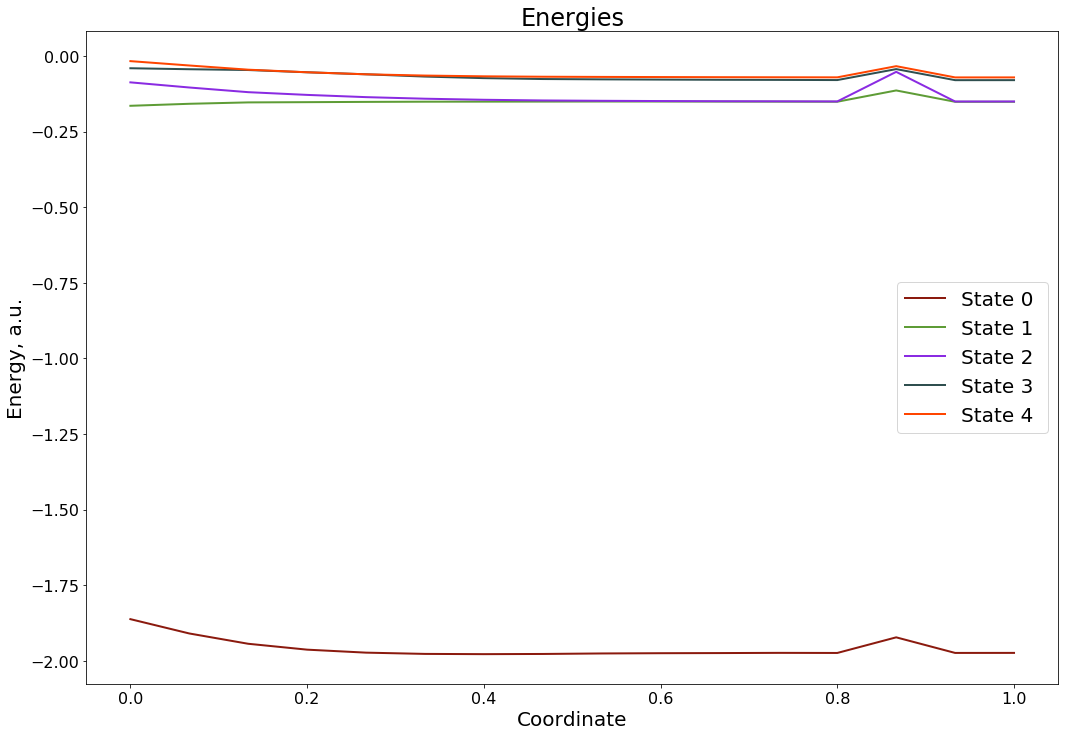

In [6]:
bands_alp = []
bands_bet = []

for t in xrange(16):
    info, all_e = QE_methods.read_qe_index("res/x0_index_%i.xml" % (t), range(1,11), 0)
    bands_alp.append(all_e[0])  # alpha orbitals
    bands_bet.append(all_e[1])  # beta orbitals


states = [0, 1, 2, 3, 4]
nst = len(states)

plt.figure(1, figsize=(18, 12)) # dpi=300, frameon=False)
plt.subplot(1,1,1)
plt.title('Energies')
plt.xlabel('Coordinate')
plt.ylabel('Energy, a.u.')
for i in xrange(nst):
    st = states[i]
    En = data_conv.unpack1(bands_alp, st, st, 0)
    plt.plot(s_axis, En, label='State %i ' % (st), linewidth=2, color = colors[clrs_index[i]]) 
plt.legend()
plt.show()
plt.close()